In [36]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as smf
import matplotlib
from pylab import *
%matplotlib inline

# Explore the Dataset

                 id diagnosis  radius.mean  texture.mean  perimeter.mean  \
mean   3.037183e+07       NaN    14.127292     19.289649       91.969033   
min    8.670000e+03       NaN     6.981000      9.710000       43.790000   
max    9.113205e+08       NaN    28.110000     39.280000      188.500000   
count  5.690000e+02       569   569.000000    569.000000      569.000000   

         area.mean  smoothness.mean  compactness.mean  concavity.mean  \
mean    654.889104          0.09636          0.104341        0.088799   
min     143.500000          0.05263          0.019380        0.000000   
max    2501.000000          0.16340          0.345400        0.426800   
count   569.000000        569.00000        569.000000      569.000000   

       concpoints.mean      ...        radius.worst  texture.worst  \
mean          0.048919      ...            16.26919      25.677223   
min           0.000000      ...             7.93000      12.020000   
max           0.201200      ...            

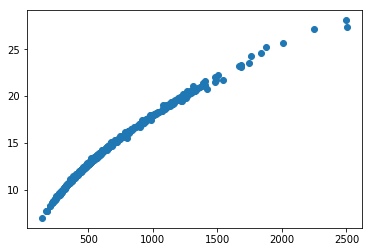

In [2]:
df = pd.read_csv("/home/umang-uw/Downloads/wdbc.csv.bz2")
df.drop(['id'], axis=1)
print(df.describe(include = 'all').loc[['mean','min','max','count']])

plt.scatter(df['area.mean'],df['radius.mean'])

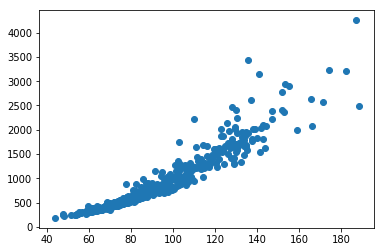

In [3]:
plt.scatter(df['perimeter.mean'],df['area.worst'])

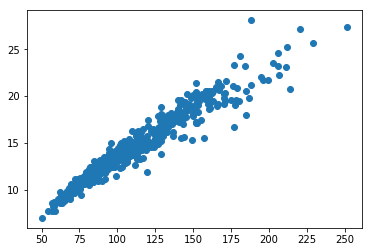

In [4]:
plt.scatter(df['perimeter.worst'],df['radius.mean'])

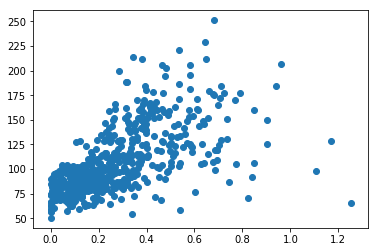

In [5]:
plt.scatter(df['concavity.worst'],df['perimeter.worst'])

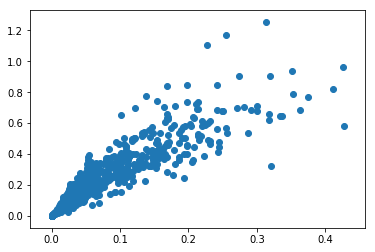

In [6]:
plt.scatter(df['concavity.mean'],df['concavity.worst'])

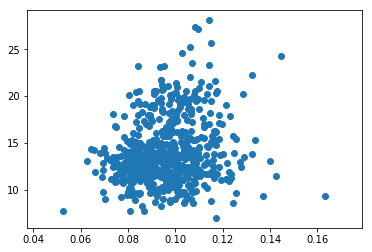

In [7]:
plt.scatter(df['smoothness.mean'],df['radius.mean'])

# Decision Boundary 

### KNN Case

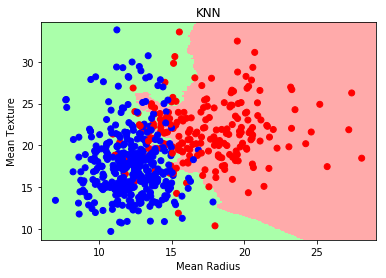

In [8]:
# loading the raw data
P=df.iloc[:,2:32]
y=pd.get_dummies(df.diagnosis).M
#predictor X
X=(P.iloc[:,0:11]).as_matrix()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
knn=KNeighborsClassifier(n_neighbors=4)

knn.fit(X_train[:,0:2], y_train)
# Plotting the decision boundary
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#AAFFAA','#FFAAAA'])
cmap_bold = ListedColormap(['#0000FF','#FF0000'])
#meshgrid
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))
xy_mesh=np.c_[xx.ravel(), yy.ravel()]
Z = knn.predict(xy_mesh).reshape(xx.shape)

plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
ax=plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max());plt.ylim(yy.min(), yy.max())
plt.xlabel('Mean Radius');plt.ylabel('Mean Texture')
plt.title('KNN')
plt.show()

KNN is good in picking up the actual shape at the same time it also picks up noise leading to overfitting !

### Logistic Regression

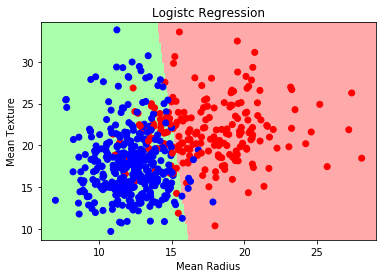

In [9]:
lgr = LogisticRegression(penalty="l2", C=1)
#perform Logistic regression and test accuracy
lgr.fit(X_train[:,0:2], y_train)

#Color maps
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#AAFFAA','#FFAAAA'])
cmap_bold = ListedColormap(['#0000FF','#FF0000'])

#meshgrid
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))
xy_mesh=np.c_[xx.ravel(), yy.ravel()]
Z = lgr.predict(xy_mesh).reshape(xx.shape)

plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Mean Radius');plt.ylabel('Mean Texture')
plt.title('Logistc Regression')
plt.show()

 Observations: It seems that KNN was overfitting the data more than Logistic regression !

### Feature Engineering Sample

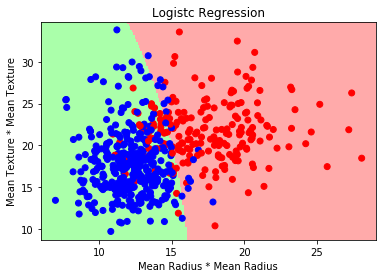

In [10]:
lgr = LogisticRegression(penalty="l2", C=1)
#perform Logistic regression and test accuracy
lgr.fit(X_train[:,0:2]**2, y_train**2)

#Color maps
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#AAFFAA','#FFAAAA'])
cmap_bold = ListedColormap(['#0000FF','#FF0000'])

#meshgrid
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))
xy_mesh=np.c_[(xx**2).ravel(), (yy**2).ravel()]
Z = lgr.predict(xy_mesh).reshape((xx**2).shape)

plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Mean Radius * Mean Radius');plt.ylabel('Mean Texture * Mean Texture')
plt.title('Logistc Regression')
plt.show()

The shape of the boundary has not evidently changed much. The actual boundary is captured pretty  well, it may or may not lead to overfitting, which is relatively hard to comment on. 

## Use the full data

### Cross Validation

In [13]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
k = 10
indices = np.arange(len(df))
np.random.shuffle(indices)
rmse = np.empty(k)
accuracy = np.empty(k)
average_precision = np.empty(k)
recall = np.empty(k)

for i in range(k):
    itest = indices[i::k]
    itrain = list(set(indices).difference(itest))
    testDat = P.iloc[itest]
    trainDat = P.iloc[itrain]
    m = lgr.fit(trainDat,y.iloc[itrain])
    yhat = lgr.predict(testDat)
    rmse[i] = np.sqrt(np.mean((yhat - y.iloc[itest])**2))
    accuracy[i] = sklearn.metrics.accuracy_score(y.iloc[itest], yhat) 
    average_precision[i] = average_precision_score(y.iloc[itest], yhat)
    recall[i] = recall_score(y.iloc[itest], yhat)
    
print("RMSE: ",np.mean(rmse))
print("Average Accuracy: ",np.mean(accuracy))
print("Average Precision: ",np.mean(average_precision))
print("Average Recall : ",np.mean(recall))




('RMSE: ', 0.2066420496902705)
('Average Accuracy: ', 0.94906015037593972)
('Average Precision: ', 0.90113023270764603)
('Average Recall : ', 0.9197049988991518)


### Regularization

In [14]:
results = pd.DataFrame(columns = ['C','Accuracy','Precision','Recall'])

#generate lambdas
lambdas = [pow(10,x) for x in range(-6,6,1)]


for i in lambdas:
    logisticRegrRidge = LogisticRegression(penalty="l2", C=i)
    #perform ridge regression 
    logisticRegrRidge.fit(X_train, y_train)
    predictions = logisticRegrRidge.predict(X_test)
    score =  sklearn.metrics.accuracy_score(y_test, predictions)
    precision = average_precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    to_append = pd.DataFrame({'C': [i],'Accuracy': [score],'Precision': [precision], 'Recall':[recall]})
    results = results.append(to_append,ignore_index=True)

print(results)
print("\n")
print("Best Value:", results.loc[results['Precision'].idxmax()])


    Accuracy              C  Precision    Recall
0   0.614035       0.000001   0.516484  1.000000
1   0.885965       0.000010   0.829258  0.744681
2   0.877193       0.000100   0.816771  0.723404
3   0.894737       0.001000   0.834582  0.787234
4   0.903509       0.010000   0.835098  0.851064
5   0.903509       0.100000   0.835098  0.851064
6   0.912281       1.000000   0.842411  0.893617
7   0.921053      10.000000   0.859771  0.893617
8   0.929825     100.000000   0.866958  0.936170
9   0.938596    1000.000000   0.884472  0.936170
10  0.938596   10000.000000   0.884472  0.936170
11  0.938596  100000.000000   0.884472  0.936170


('Best Value:', Accuracy        0.938596
C            1000.000000
Precision       0.884472
Recall          0.936170
Name: 9, dtype: float64)


## ROC curve: which estimator is the best

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


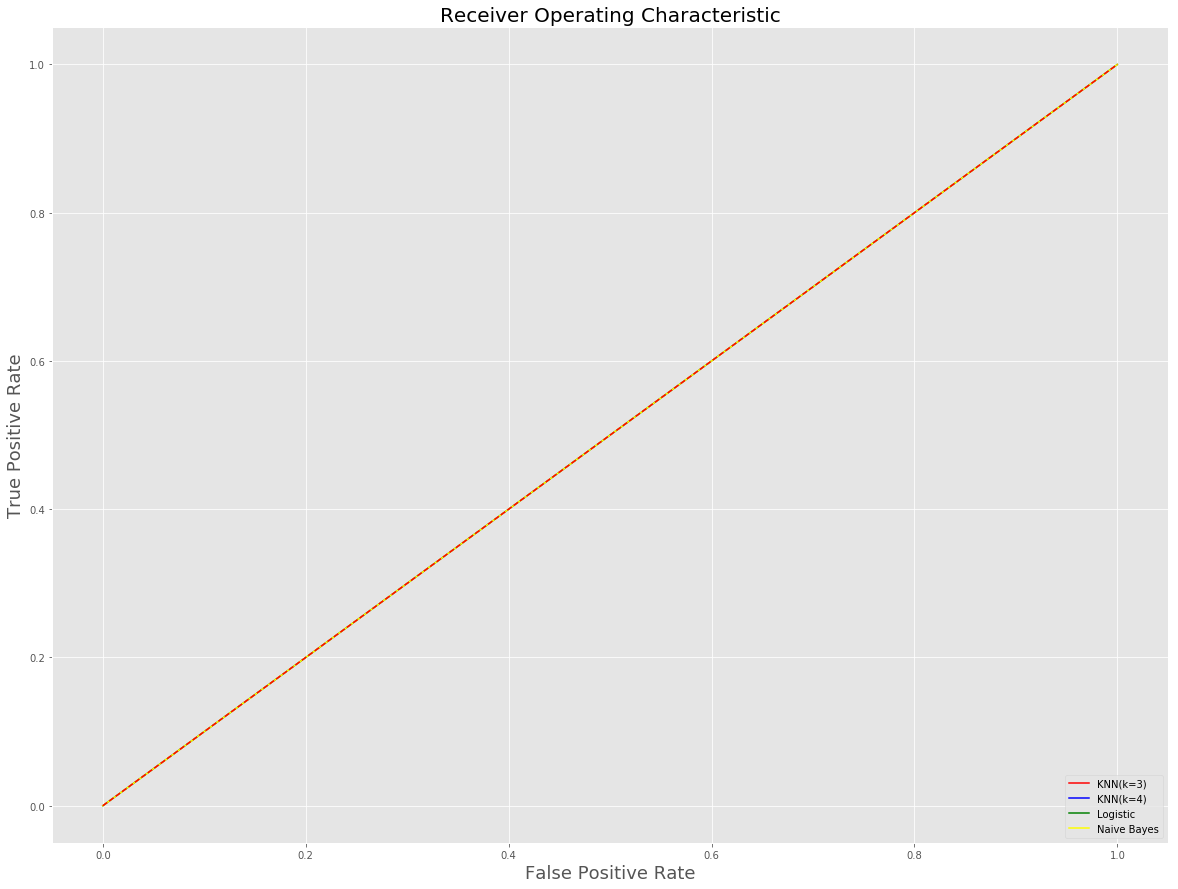

In [41]:
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(df['diagnosis']) 
df['diagnosis'] = label_encoder.transform(df['diagnosis'])
X_train3, X_test3, y_train3, y_test3 = train_test_split(df.drop(['diagnosis'],axis=1),df['diagnosis'], test_size=0.3, random_state=0)

#KNNs 
knn3=KNeighborsClassifier(n_neighbors=3)
knn4=KNeighborsClassifier(n_neighbors=4)
#Logistic Regressions
lgr1k = LogisticRegression(penalty="l2", C=1000)
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
nbb = GaussianNB()


#Fitting them

nbb.fit(pd.DataFrame(X_train3), pd.DataFrame(y_train3))
lgr1k.fit(pd.DataFrame(X_train3), pd.DataFrame(y_train3))
knn3.fit(pd.DataFrame(X_train3), pd.DataFrame(y_train3))
knn4.fit(pd.DataFrame(X_train3), pd.DataFrame(y_train3))

def generate_roc_stats(xtest, ytest, classifier):
    nsteps = 50
    tp = np.empty((nsteps,1))
    fp = np.empty_like(tp)
    haty = classifier.predict_proba(xtest)[:,1]  # Get predicted probabilities on the test data
    for i, threshold in enumerate(np.linspace(0, 1, nsteps)):  # Create increments for threshold
        tp[i] = np.sum(np.logical_and(ytest == 1, haty > threshold))/np.sum(ytest)
        fp[i] = np.sum(np.logical_and(ytest == 0, haty > threshold))/np.sum(ytest == 0)
    return fp, tp



FP_Rate1,TP_Rate1 = generate_roc_stats(X_test3,y_test3,knn3)
FP_Rate2,TP_Rate2 = generate_roc_stats(X_test3,y_test3,knn4)
FP_Rate3,TP_Rate3 = generate_roc_stats(X_test3,y_test3,lgr1k)
FP_Rate4,TP_Rate4 = generate_roc_stats(X_test3,y_test3,nbb)


plt.style.use('ggplot')
plt.figure(figsize=(20,15))
plt.title('Receiver Operating Characteristic', fontsize=20)
plt.plot(FP_Rate1,TP_Rate1,label="KNN(k=3)", color='red')
plt.plot(FP_Rate2,TP_Rate2,label="KNN(k=4)", color='blue')
plt.plot(FP_Rate3,TP_Rate3,label="Logistic", color='green')
plt.plot(FP_Rate4,TP_Rate4,label="Naive Bayes", color='yellow')
plt.plot([0,1],[0,1],'r--')
plt.legend(loc=4)
plt.ylabel('True Positive Rate',fontsize=18)
plt.xlabel('False Positive Rate',fontsize=18)
plt.show()



As the ROC curve is coming as a straight line for all the models (which is not as expected) there can be no comment on which is a better fit model for this dataset. 